# Bike Rental Machine Learning Assignment with Linear Regression

In [1]:
## Step 1: Reading and understanding the data

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [3]:
# 1.Importing Required Libraries 
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# 3.Preliminary Analysis on the dataset. Shape, Describe and info commands were used.
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# find the missing value counts in each column
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# find the missing value precentage in each column
round(100 * (df.isnull().sum() / len(df.index)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# Convertion of variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated
df['weathersit'] = df['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'})
df['season'] = df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###Step 2: Data Visualization i.e. Visualising the data

<AxesSubplot:xlabel='weathersit', ylabel='registered'>

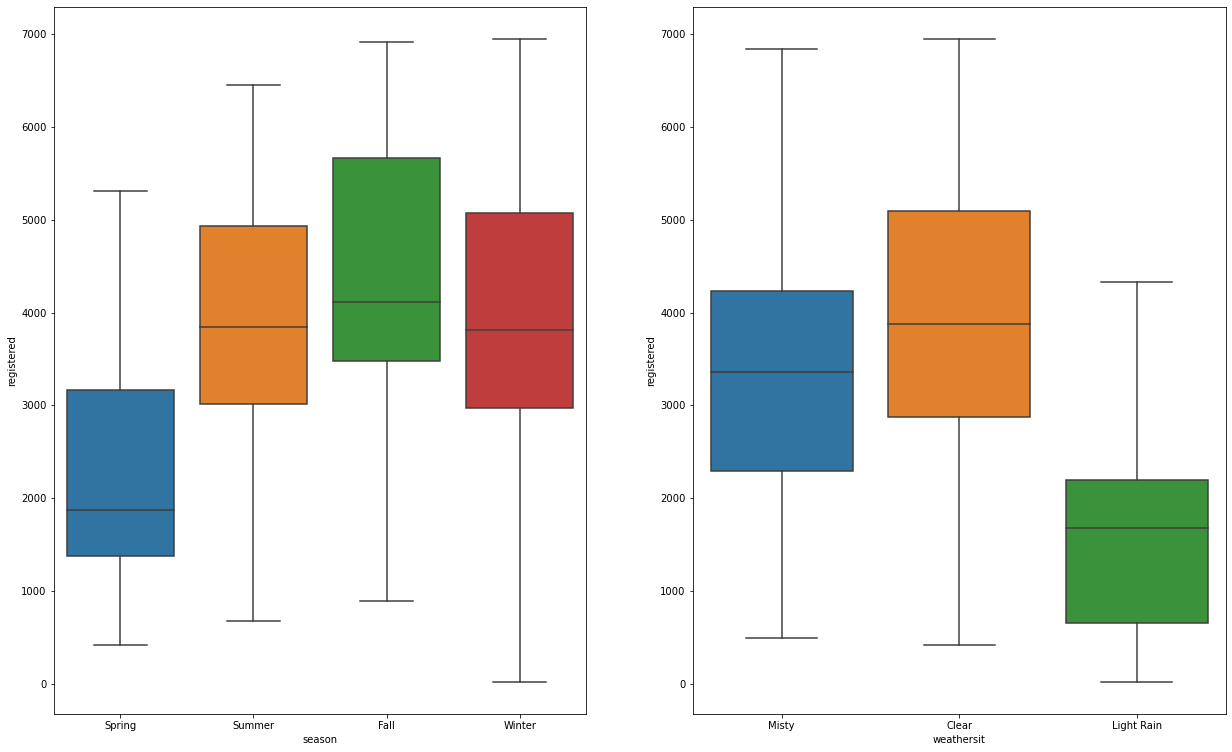

In [10]:
# 1.Visualising Categorical columns to see the coorelation of predictor variable with the target variable
plt.figure(figsize=(21,13))
plt.subplot(1,2,1)   #total 1 rows,2 columns,1 index in current plot
sns.boxplot(x = 'season',y='registered',data =df)
plt.subplot(1,2,2)   #total 1 rows,2 columns,2 index in current plot
sns.boxplot(x = 'weathersit',y='registered',data =df)

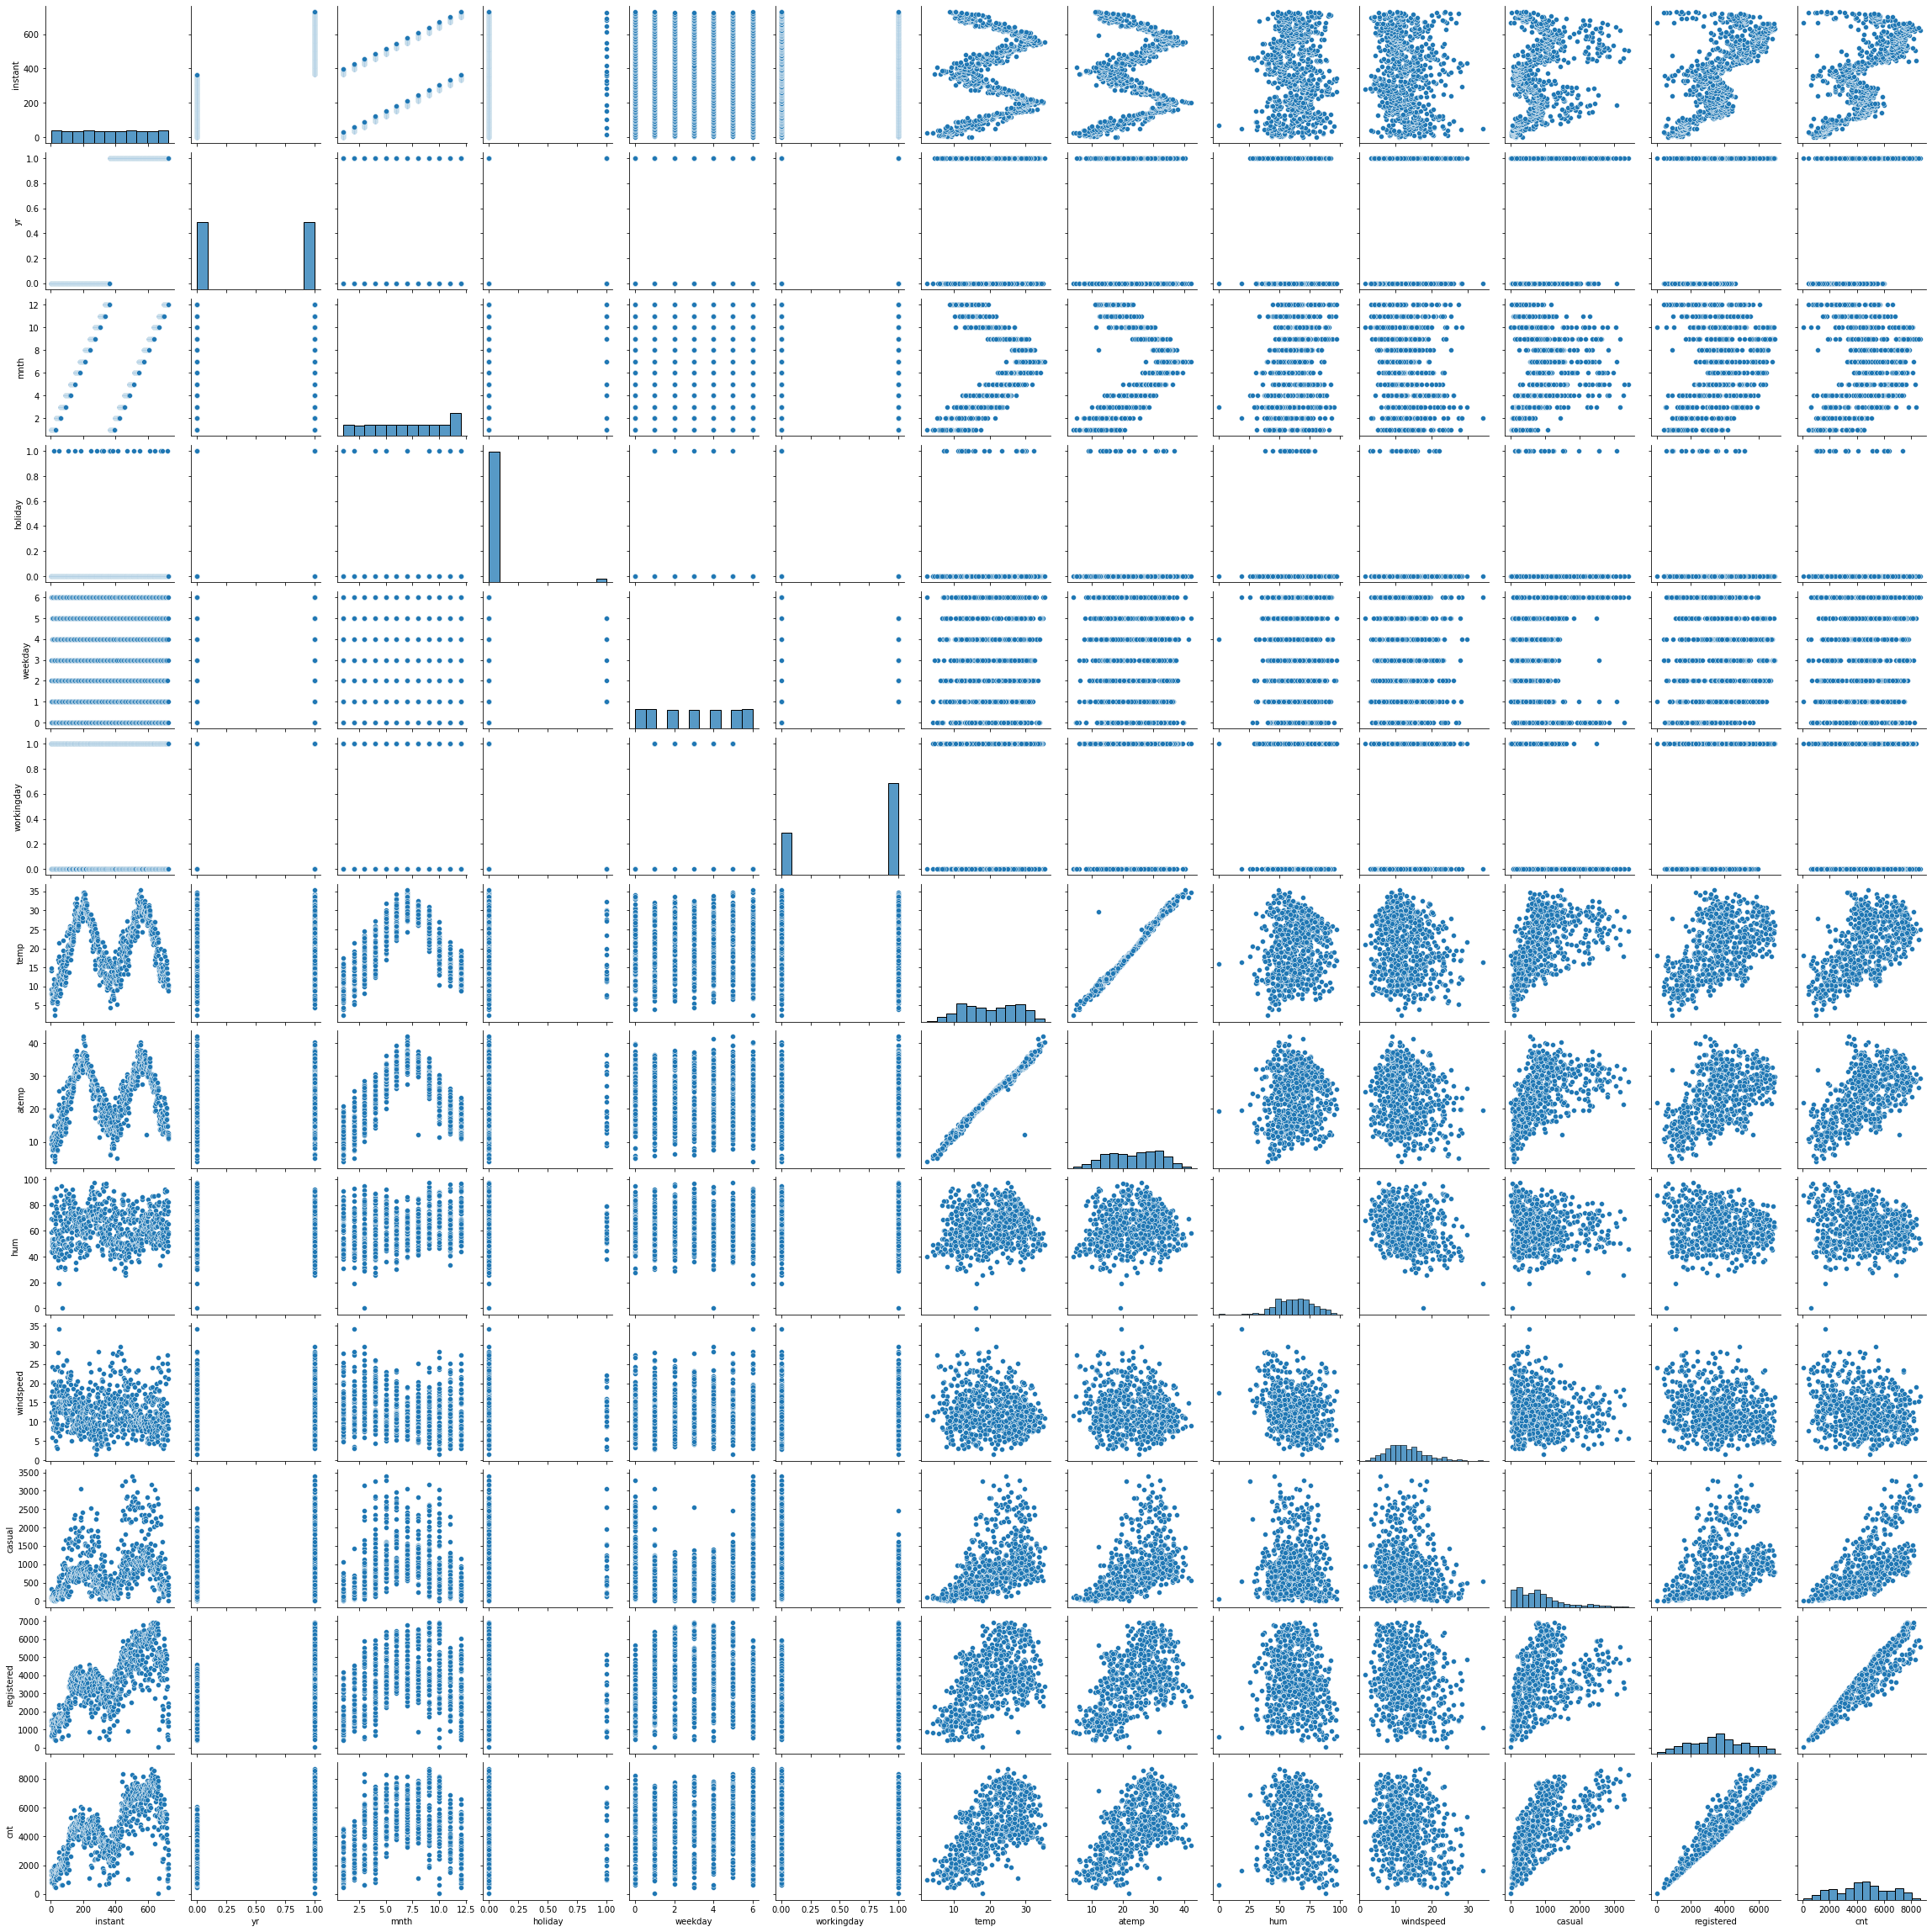

In [11]:
# 2.Visualising Numerical Variables
sns.pairplot(df)
plt.show()

In [12]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###Step 3: Data Preparation

 ##1.Creating Dummy variables with k-1 columns where k = number of individual unique value. 
 Then, concatenating it to the original Dataframe and dropping the original Column as it is no longer need and is redundant.


In [13]:
df = df.drop(columns = ["dteday","instant","registered"])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,985
1,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,801
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1349
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1562
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1600


In [14]:
status = pd.get_dummies(df['season'])
status.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [15]:
status1 = pd.get_dummies(df['weathersit'])
status1.head()

,Clear,Light Rain,Misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
df = pd.concat([df, status,status1], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,Fall,Spring,Summer,Winter,Clear,Light Rain,Misty
0,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,985,0,1,0,0,0,0,1
1,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,801,0,1,0,0,0,0,1
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1349,0,1,0,0,1,0,0
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1562,0,1,0,0,1,0,0
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1600,0,1,0,0,1,0,0


In [17]:
df.drop(['season','weathersit'], axis = 1, inplace = True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,cnt,Fall,Spring,Summer,Winter,Clear,Light Rain,Misty
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,985,0,1,0,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,801,0,1,0,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1349,0,1,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1562,0,1,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1600,0,1,0,0,1,0,0


In [18]:
# Shape of New DataFrame
df.shape

(730, 18)

###Step 4 : Building the Model

In [19]:
# Shape of New DataFrame
# 1.Splitting the data into Training and test data with 70:30 Ratio using train_test_split method.
df_train,df_test = train_test_split(df,train_size=0.70,test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 18)
(219, 18)


In [20]:
# 2.Scaling Train data using MinMaxScaler(MinMaxScaler scales data between 0 and 1)
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','casual','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,cnt,Fall,Spring,Summer,Winter,Clear,Light Rain,Misty
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.864243,0,0,0,1,1,0,0
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.827658,1,0,0,0,1,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.465255,0,1,0,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.204096,0,1,0,0,1,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.482973,0,0,1,0,0,0,1


In [21]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,cnt,Fall,Spring,Summer,Winter,Clear,Light Rain,Misty
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.864243,0,0,0,1,1,0,0
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.827658,1,0,0,0,1,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.465255,0,1,0,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.204096,0,1,0,0,1,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.482973,0,0,1,0,0,0,1


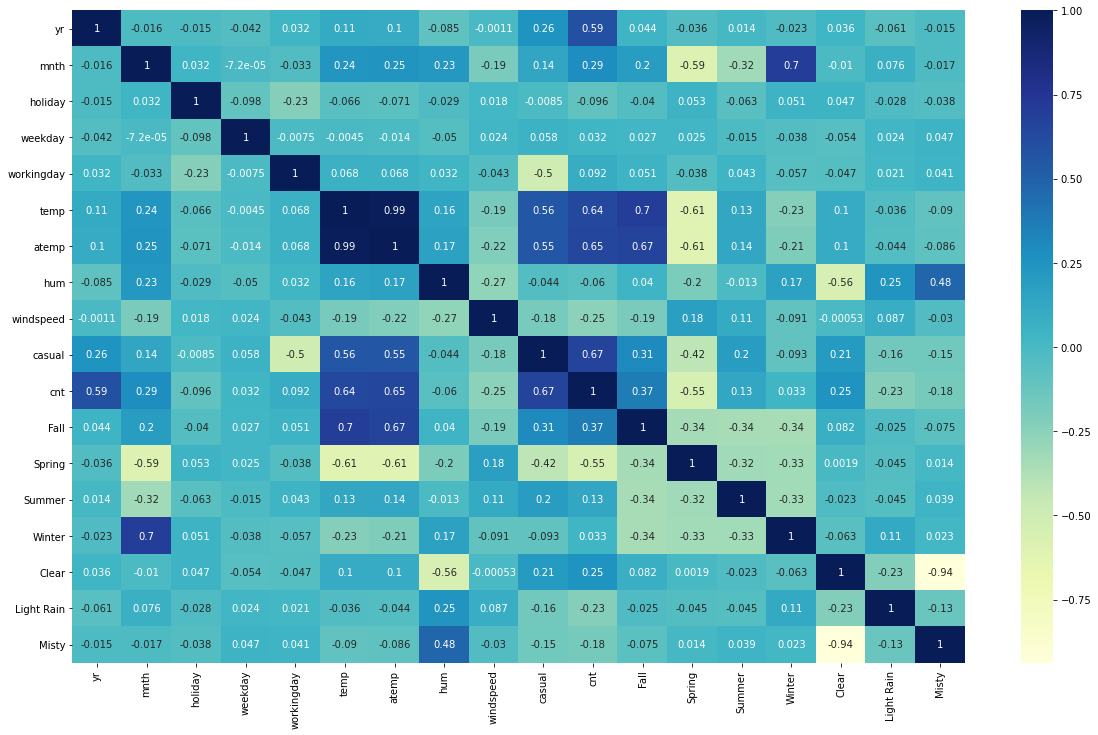

In [22]:
##3.Visualising Correlation between different Variables
plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [23]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,cnt,Fall,Spring,Summer,Winter,Clear,Light Rain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,0.507843,6.549020,0.025490,2.990196,0.676471,0.537262,0.512989,0.650369,0.320768,0.254661,0.513620,0.262745,0.243137,0.245098,0.24902,0.627451,0.029412,0.343137
std,0.500429,3.468714,0.157763,2.017093,0.468282,0.225844,0.212385,0.145882,0.169797,0.206011,0.224593,0.440557,0.429398,0.430568,0.43287,0.483958,0.169124,0.475223
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.356420,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.518638,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.684710,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [24]:
# 3.Build the model

#Initilize the Linear Regression Model
#Creating y_train(Target variable) and X_train(all other independent variables)
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
#running rfe
# 4. Use RFE(Recursive Feature Elimination) to limit the variables.

#Initilzing RFE and giving number of features to select.
#Fit the data to RFE
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select = 14)     
rfe = rfe.fit(X_train,y_train)

In [26]:
#Lets see which features were selected and which features were not selected and thier rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('Fall', False, 2),
 ('Spring', True, 1),
 ('Summer', False, 4),
 ('Winter', True, 1),
 ('Clear', True, 1),
 ('Light Rain', True, 1),
 ('Misty', True, 1)]

In [27]:
#Columns that were selcted by RFE
#Columns that were not selected by RFE
# 5.Taking only RFE selected features and adding Constant to it.
# Note : Statsmodel by default draws the line from the center(0,0), we need to give a Constant(intercept) value for it to consider.
#model 1
num_vars = X_train.columns[rfe.support_]
X_train_lm = X_train[num_vars]
X_train_lm_sm = sm.add_constant(X_train_lm)
X_train_lm_sm

,const,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,Spring,Winter,Clear,Light Rain,Misty
653,1.0,1,0,2,1,0.509887,0.501133,0.575354,0.300794,0.280402,0,1,1,0,0
576,1.0,1,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0,0,1,0,0
426,1.0,1,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,1,0,0,0,1
728,1.0,1,0,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,1,0,1,0,0
482,1.0,1,0,6,0,0.395666,0.391735,0.504508,0.188475,0.340750,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,1,0.824514,0.762183,0.605840,0.355596,0.309357,0,0,0,0,1
578,1.0,1,0,4,1,0.863973,0.824359,0.679690,0.187140,0.298994,0,0,1,0,0
53,1.0,0,0,3,1,0.202618,0.218747,0.435939,0.111379,0.041756,1,0,1,0,0
350,1.0,0,0,6,0,0.248216,0.223544,0.577930,0.431816,0.083206,0,1,0,0,1


In [28]:

# 6.Initilize a OLS(Ordinary Least Squares regression) using updated X_train and y_train and fit the model.
# Once fitted, we can use an inbuilt method called summary() to check p value, R^2 value and other important values.

#Build 1X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     366.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.43e-244
Time:                        19:47:04   Log-Likelihood:                 640.71
No. Observations:                 510   AIC:                            -1253.
Df Residuals:                     496   BIC:                            -1194.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0308      0.022      1.388      0.166      -0.013       0.074
yr             0.1844      0.007     27.315      0.000       0.171       0.198
holiday        0.0057      0.021      0.276      0.782      -0.035       0.046
weekday        0.0044      0.002      2.814      0.005       0.001       0.007
workingday     0.1591      0.010     16.206      0.000       0.140       0.178
temp           0.1523      0.100      1.527      0.127      -0.044       0.348
atemp          0.0868      0.105      0.828      0.408      -0.119       0.293
hum           -0.0622      0.029     -2.132      0.033      -0.120      -0.005
windspeed     -0.0878      0.020     -4.324      0.000      -0.128      -0.048
casual         0.5601      0.028     19.885      0.000       0.505       0.615
Spring        -0.0622      0.012     -5.280      0.000      -0.085      -0.039
Winter         0.0740      0.010      7.699      0.000       0.055       0.093
Clear          0.0837      0.008     10.279      0.000       0.068       0.100
Light Rain    -0.0963      0.017     -5.573      0.000      -0.130      -0.062
Misty          0.0434      0.010      4.492      0.000       0.024       0.062
==============================================================================
Omnibus:                      121.381   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              404.939
Skew:                          -1.082   Prob(JB):                     1.17e-88
Kurtosis:                       6.791   Cond. No.                     7.04e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

,feature,VIF
4,temp,52.88
5,atemp,51.69
11,Clear,46.85
13,Misty,31.26
12,Light Rain,4.08
8,casual,3.51
9,Spring,2.67
3,workingday,2.21
6,hum,1.89
10,Winter,1.81


In [30]:
# temp vif value was greater than 5, so dropping.
# model 2
X_train_lm = X_train_lm.drop('temp',axis=1)

In [31]:
# Rebuilding Model
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     395.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.24e-245
Time:                        19:47:04   Log-Likelihood:                 639.51
No. Observations:                 510   AIC:                            -1253.
Df Residuals:                     497   BIC:                            -1198.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0313      0.022      1.412      0.158      -0.012       0.075
yr             0.1845      0.007     27.288      0.000       0.171       0.198
holiday        0.0076      0.021      0.366      0.715      -0.033       0.048
weekday        0.0045      0.002      2.892      0.004       0.001       0.008
workingday     0.1601      0.010     16.309      0.000       0.141       0.179
atemp          0.2420      0.026      9.428      0.000       0.192       0.292
hum           -0.0624      0.029     -2.136      0.033      -0.120      -0.005
windspeed     -0.0830      0.020     -4.133      0.000      -0.122      -0.044
casual         0.5635      0.028     20.039      0.000       0.508       0.619
Spring        -0.0645      0.012     -5.508      0.000      -0.087      -0.041
Winter         0.0711      0.009      7.536      0.000       0.053       0.090
Clear          0.0832      0.008     10.214      0.000       0.067       0.099
Light Rain    -0.0946      0.017     -5.482      0.000      -0.129      -0.061
Misty          0.0428      0.010      4.430      0.000       0.024       0.062
==============================================================================
Omnibus:                      122.378   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.888
Skew:                          -1.091   Prob(JB):                     2.68e-89
Kurtosis:                       6.799   Cond. No.                     7.07e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

,feature,VIF
10,Clear,46.85
12,Misty,31.26
11,Light Rain,4.08
7,casual,3.49
4,atemp,3.09
8,Spring,2.63
3,workingday,2.20
5,hum,1.89
9,Winter,1.73
6,windspeed,1.21


In [33]:
# Clear vif value was greater than 5, so dropping.
# model 3
X_train_lm = X_train_lm.drop('Clear',axis=1)

In [34]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     395.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.24e-245
Time:                        19:47:04   Log-Likelihood:                 639.51
No. Observations:                 510   AIC:                            -1253.
Df Residuals:                     497   BIC:                            -1198.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1145      0.027      4.280      0.000       0.062       0.167
yr             0.1845      0.007     27.288      0.000       0.171       0.198
holiday        0.0076      0.021      0.366      0.715      -0.033       0.048
weekday        0.0045      0.002      2.892      0.004       0.001       0.008
workingday     0.1601      0.010     16.309      0.000       0.141       0.179
atemp          0.2420      0.026      9.428      0.000       0.192       0.292
hum           -0.0624      0.029     -2.136      0.033      -0.120      -0.005
windspeed     -0.0830      0.020     -4.133      0.000      -0.122      -0.044
casual         0.5635      0.028     20.039      0.000       0.508       0.619
Spring        -0.0645      0.012     -5.508      0.000      -0.087      -0.041
Winter         0.0711      0.009      7.536      0.000       0.053       0.090
Light Rain    -0.1778      0.021     -8.564      0.000      -0.219      -0.137
Misty         -0.0404      0.008     -4.901      0.000      -0.057      -0.024
==============================================================================
Omnibus:                      122.378   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.888
Skew:                          -1.091   Prob(JB):                     2.68e-89
Kurtosis:                       6.799   Cond. No.                         49.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

,feature,VIF
5,hum,23.49
4,atemp,19.73
7,casual,7.85
3,workingday,5.85
6,windspeed,3.98
2,weekday,3.21
8,Spring,2.57
0,yr,2.42
11,Misty,2.33
9,Winter,2.03


In [36]:
# hum vif value was greater than 5, so dropping.
#model4
X_train_lm = X_train_lm.drop('hum',axis=1)

In [37]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     428.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.02e-245
Time:                        19:47:04   Log-Likelihood:                 637.18
No. Observations:                 510   AIC:                            -1250.
Df Residuals:                     498   BIC:                            -1200.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0781      0.021      3.774      0.000       0.037       0.119
yr             0.1855      0.007     27.403      0.000       0.172       0.199
holiday        0.0082      0.021      0.395      0.693      -0.033       0.049
weekday        0.0048      0.002      3.075      0.002       0.002       0.008
workingday     0.1616      0.010     16.451      0.000       0.142       0.181
atemp          0.2286      0.025      9.152      0.000       0.180       0.278
windspeed     -0.0709      0.019     -3.666      0.000      -0.109      -0.033
casual         0.5688      0.028     20.240      0.000       0.514       0.624
Spring        -0.0653      0.012     -5.558      0.000      -0.088      -0.042
Winter         0.0676      0.009      7.253      0.000       0.049       0.086
Light Rain    -0.1944      0.019    -10.054      0.000      -0.232      -0.156
Misty         -0.0504      0.007     -7.397      0.000      -0.064      -0.037
==============================================================================
Omnibus:                      123.290   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.091
Skew:                          -1.094   Prob(JB):                     2.69e-91
Kurtosis:                       6.852   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

,feature,VIF
4,atemp,13.72
6,casual,7.63
3,workingday,5.54
5,windspeed,3.96
2,weekday,3.20
0,yr,2.40
7,Spring,1.82
10,Misty,1.55
8,Winter,1.44
9,Light Rain,1.13


In [39]:
# casual vif value was greater than 5, so dropping.
#model5
X_train_lm = X_train_lm.drop('casual',axis=1)

In [40]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.50e-182
Time:                        19:47:04   Log-Likelihood:                 484.12
No. Observations:                 510   AIC:                            -946.2
Df Residuals:                     499   BIC:                            -899.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2289      0.026      8.789      0.000       0.178       0.280
yr             0.2367      0.008     27.959      0.000       0.220       0.253
holiday       -0.0620      0.028     -2.246      0.025      -0.116      -0.008
weekday        0.0089      0.002      4.261      0.000       0.005       0.013
workingday     0.0194      0.009      2.099      0.036       0.001       0.038
atemp          0.4365      0.031     14.217      0.000       0.376       0.497
windspeed     -0.1322      0.026     -5.134      0.000      -0.183      -0.082
Spring        -0.1248      0.015     -8.139      0.000      -0.155      -0.095
Winter         0.0418      0.012      3.354      0.001       0.017       0.066
Light Rain    -0.2822      0.025    -11.103      0.000      -0.332      -0.232
Misty         -0.0790      0.009     -8.787      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       74.476   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.992
Skew:                          -0.742   Prob(JB):                     1.51e-41
Kurtosis:                       5.577   Cond. No.                         38.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

,feature,VIF
4,atemp,5.17
5,windspeed,3.96
3,workingday,3.08
2,weekday,3.05
0,yr,2.05
6,Spring,1.82
9,Misty,1.52
7,Winter,1.43
1,holiday,1.09
8,Light Rain,1.08


In [42]:
# atemp vif value was greater than 5, so dropping.
#model5
X_train_lm = X_train_lm.drop('atemp',axis=1)

In [43]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     171.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.29e-146
Time:                        19:47:04   Log-Likelihood:                 397.40
No. Observations:                 510   AIC:                            -774.8
Df Residuals:                     500   BIC:                            -732.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5359      0.017     31.074      0.000       0.502       0.570
yr             0.2486      0.010     24.922      0.000       0.229       0.268
holiday       -0.0661      0.033     -2.021      0.044      -0.130      -0.002
weekday        0.0088      0.002      3.530      0.000       0.004       0.014
workingday     0.0210      0.011      1.919      0.056      -0.001       0.043
windspeed     -0.1998      0.030     -6.667      0.000      -0.259      -0.141
Spring        -0.2832      0.012    -22.720      0.000      -0.308      -0.259
Winter        -0.0559      0.012     -4.537      0.000      -0.080      -0.032
Light Rain    -0.2928      0.030     -9.733      0.000      -0.352      -0.234
Misty         -0.0929      0.011     -8.771      0.000      -0.114      -0.072
==============================================================================
Omnibus:                       31.803   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.836
Skew:                          -0.406   Prob(JB):                     2.76e-13
Kurtosis:                       4.436   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

,feature,VIF
4,windspeed,3.39
2,weekday,2.62
3,workingday,2.55
0,yr,1.85
8,Misty,1.51
5,Spring,1.49
6,Winter,1.40
7,Light Rain,1.08
1,holiday,1.07


In [45]:
###Step 6: Residual Analysis on the training data and model validation.

In [46]:
##.# 1.Predicting the Y_train value(Count) using the model
y_train_pred = lm_model.predict(X_train_lm_sm)
y_train_pred

653    0.707179
576    0.770243
426    0.410063
728    0.368817
482    0.706662
         ...   
526    0.650458
578    0.803279
53     0.277768
350    0.353562
79     0.367004
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

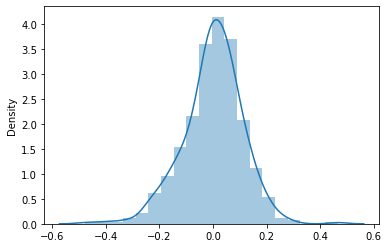

In [47]:
# 2.Calculating Residual value
# 3.Visualising the residual value to check if the model not failing any conditions

res = y_train - y_train_pred
sns.distplot(res,bins=20)

In [48]:
res.head()

653    0.157064
576    0.057415
426    0.055192
728   -0.164721
482   -0.223689
dtype: float64

###Step 7: Making Predictions Using the Final Model

In [49]:
# 4.Scaling the test Dataset
var_list = ['temp','atemp','hum','windspeed','casual','cnt']
df_test[var_list] = scaler.transform(df_test[var_list])

In [50]:
# 5.Extracting y_test and X_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,Fall,Spring,Summer,Winter,Clear,Light Rain,Misty
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,1,0,0,0,0,0,1
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0.265163,0,0,1,0,1,0,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0.072539,0,0,0,1,0,0,1
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0.268820,1,0,0,0,1,0,0
152,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0.223712,0,0,1,0,1,0,0


In [51]:
# 6. Dropping all the Columns that we have dropped in the training of the model
X_test = X_test.drop(columns=["temp","atemp","hum","mnth","casual","Fall","Clear","Summer"])

In [52]:
# 7. Adding the constant to X_test and making Predictions to find y_pred value.
X_test_sm =sm.add_constant(X_test)

In [53]:
y_pred = lm_model.predict(X_test_sm)


###Step 8: Model Evaluation

In [54]:
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test,y_pred)
print(r_squared_train*100)
print(r_squared_test*100)

75.52193010844705
73.61196639198322


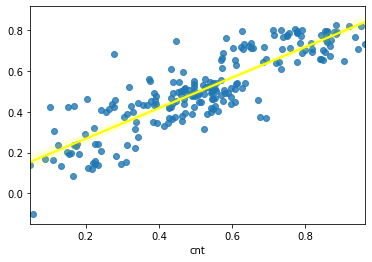

In [55]:
# Plotting Y_test vs Y_pred Scatter plot
plt.figure()
sns.regplot(x=y_test, y=y_pred,fit_reg=True, line_kws={"color":"yellow"})
plt.show()

In [56]:
### Best FIT line for model parameters 0.5297 + .2489 * year + 0.0093 * weekday + 0.0261 * workingday + (-0.2001) * windspeed + (-0.2848) * Spring + (-0.0573) * Winter + (-0.2909) * Light Rain +(-0.0922)*Misty     
round(lm_model.params,4)

const         0.5359
yr            0.2486
holiday      -0.0661
weekday       0.0088
workingday    0.0210
windspeed    -0.1998
Spring       -0.2832
Winter       -0.0559
Light Rain   -0.2928
Misty        -0.0929
dtype: float64

***The Best Fit Line is (0.5359 + .2486 * year +(-0.0661) * holiday + 0.0088 * weekday + 0.0210 * workingday + (-0.1998) * windspeed + (-0.2832) * Spring + (-0.0559) * Winter + (-0.2928) * Light Rain +(-0.0929)*Misty )    

In [57]:
# Calculating Adjusted-R^2 value for Train and Test a dataset
adjusted_r2_train = round(1-(1-r_squared_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
adjusted_r2_test = round(1-(1-r_squared_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2_train)
print(adjusted_r2_test)

0.7468
0.7248


### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.7552
- Test dataset R^2           : 0.7361
- Train dataset Adjusted R^2 : 0.7468    
- Test dataset Adjusted R^2  : 0.7248